Name = Goutam Kumar Sah

Roll Number = 2312res271

Experiment No = 6

Title = DBSCAN

Aim = Implementation of DBSCAN Algorithm

# Theory

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that identifies clusters in a dataset based on the density of data points. Unlike traditional clustering methods like K-means, which partition data into a fixed number of clusters, DBSCAN discovers clusters of varying shapes and sizes and is robust to noise.

The algorithm operates using two key parameters: epsilon (ε) and minPts. Epsilon defines the radius within which the algorithm searches for neighboring points, while minPts is the minimum number of points required to form a dense region (a cluster). The primary steps of the DBSCAN algorithm are as follows:



1.   Core Points: A point is classified as a core point if at least minPts points are found within the ε neighborhood. Core points are at the center of dense regions.
2. Border Points: A border point is a point that is within the ε neighborhood of a core point but does not have enough points in its own ε neighborhood to be classified as a core point.

3. Noise Points: Any point that is neither a core point nor a border point is classified as noise. These points are often outliers.

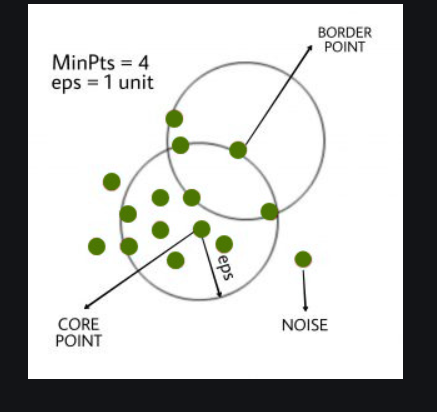

The algorithm begins by selecting an unvisited point and checking if it is a core point. If it is, a new cluster is formed, and the algorithm recursively includes all reachable points (core and border points) in this cluster. If the selected point is not a core point, it is labeled as noise. The process continues until all points in the dataset have been visited.

DBSCAN is particularly effective for spatial data and is widely used in various fields such as geography, biology, and marketing. Its ability to handle noise and identify clusters of arbitrary shapes makes it a versatile choice for clustering tasks, although it can struggle with varying densities and requires careful parameter tuning.










# Steps Used In DBSCAN Algorithm



1.   Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.
2.  For each core point if it is not already assigned to a cluster, create a new cluster.
3. Find recursively all its density-connected points and assign them to the same cluster as the core point.
A point a and b are said to be density connected if there exists a point c which has a sufficient number of points in its neighbors and both points a and b are within the eps distance. This is a chaining process. So, if b is a neighbor of c, c is a neighbor of d, and d is a neighbor of e, which in turn is  neighbor of a implying that b is a neighbor of a.
4. Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.


In [ ]:
#Pseudocode For DBSCAN Clustering Algorithm
DBSCAN(dataset, eps, MinPts){
# cluster index
C = 1
for each unvisited point p in dataset {
         mark p as visited
         # find neighbors
         Neighbors N = find the neighboring points of p

         if |N|>=MinPts:
             N = N U N'
             if p' is not a member of any cluster:
                 add p' to cluster C
}

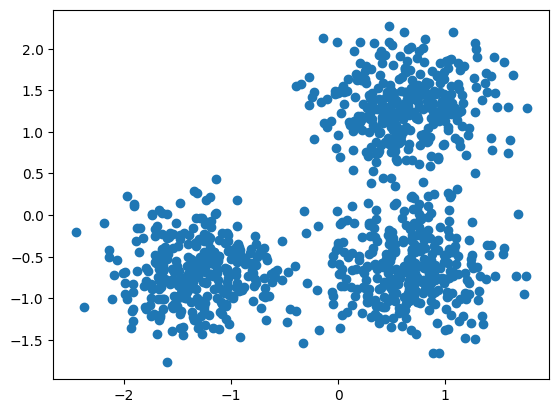

In [5]:
from sklearn import datasets
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=1000, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
plt.scatter(X[:,0], X[:,1])

In [6]:
class DataPoint:
    def __init__(self, coords, point_type, neighbors, cluster_id):
        self.coords = coords
        self.point_type = point_type  # 1 for core point, 2 for border point, 3 for outlier
        self.neighbors = neighbors
        self.cluster_id = cluster_id  # 1, 2, 3, ... when it has been assigned to a cluster

def calculate_distance(data_array, point, epsilon, min_points):
    neighbor_indices = []
    point_type = 0
    for idx in range(len(data_array)):
        current_point = data_array[idx]
        distance = 0
        for dim in range(len(current_point)):
            distance += (current_point[dim] - point[dim]) ** 2
        distance = distance ** (1 / 2)
        if distance < epsilon:
            neighbor_indices.append(idx)
    if len(neighbor_indices) > min_points:
        point_type = 1  # core point
    elif len(neighbor_indices) > 1:
        point_type = 2  # border point
    else:
        point_type = 3  # outlier
    return [neighbor_indices, point_type]

def DBSCAN(data_array, epsilon, min_points):  # data_array is a numpy array of lists. Each list contains the coordinates of the data points.
    cluster_counter = 0
    point_list = []
    for data in data_array:  # Step 1: Initialize points as core, border, or outlier points; O(n^2)
        [neighbor_indices, point_type] = calculate_distance(data_array, data, epsilon, min_points)
        point_list.append(DataPoint(data, point_type, neighbor_indices, 1 - point_type))

    for index in range(len(data_array)):  # Loop through all data points
        if point_list[index].cluster_id == 0:  # if a point is a core point and it has not been clustered yet
            cluster_counter += 1
            point_list[index].cluster_id = cluster_counter
            expand_cluster(data_array, cluster_counter, point_list, index, epsilon, min_points)

    return point_list

def expand_cluster(data_array, cluster_id, point_list, idx, epsilon, min_points):  # Step 2b
    cluster_members = point_list[idx].neighbors
    i = 0
    while i < len(cluster_members):
        expansion_index = cluster_members[i]  # set an expansion point
        if point_list[expansion_index].cluster_id == -1:  # if it's a border point that has NOT been assigned to a cluster
            point_list[expansion_index].cluster_id = cluster_id
        elif point_list[expansion_index].cluster_id == 0:  # if it's a core point that has NOT been assigned to a cluster
            point_list[expansion_index].cluster_id = cluster_id
            cluster_members += point_list[expansion_index].neighbors
        i += 1


In [8]:
X, y_true = make_blobs(n_samples=1000, centers=3, cluster_std=0.5, random_state=42)

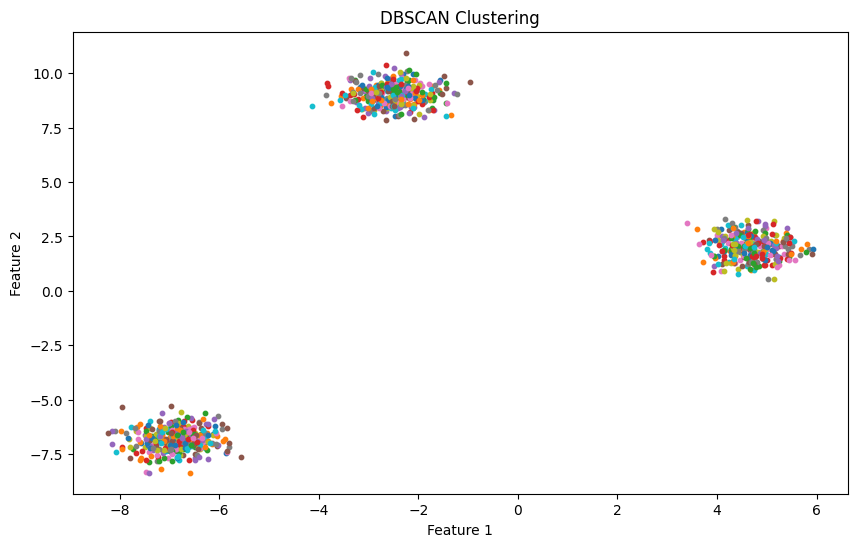

In [9]:
points = DBSCAN(X, 0.5, 5)

# Visualization
plt.figure(figsize=(10, 6))
for point in points:
    if point.cluster_id == 0:
        plt.scatter(point.coords[0], point.coords[1], color='gray', s=10)  # Outliers
    else:
        plt.scatter(point.coords[0], point.coords[1], label=f'Cluster {point.cluster_id}', s=10)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [13]:
import numpy as np
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
# Extract cluster labels
labels = np.array([point.cluster_id for point in points])

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)

# Calculate Normalized Mutual Information
nmi = normalized_mutual_info_score(y_true, labels, average_method='arithmetic')
print("Normalized Mutual Information: %0.2f" % nmi)

Adjusted Rand Index: 0.99
Normalized Mutual Information: 0.99


By using SkLearn Library DBSCAN Algorithm

In [14]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)

['y', 'b', 'g', 'r']


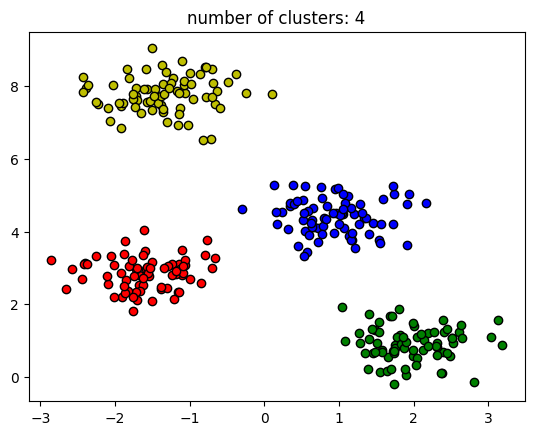

In [17]:
from sklearn.cluster import DBSCAN
import numpy as np

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
db.fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [19]:
from sklearn import metrics
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.71
Adjusted Rand Index: 0.97
